# Compile metrics

This notebook takes the four metric dataframes, and compiles them into one.

In [60]:
from get_all_metrics import get_metrics, get_timestamps

metrics = get_metrics("../results/phase_3_400000ops_2_3600")

# print(get_timestamps("../results/phase_3_400000ops_2_3600_stderr"))

# for metric in metrics:
#     print(metric)

In [61]:
metric_list = list(metrics)
metric_list[0]

,Timestamp,MemoryUsed,ReadThroughput_avg_1minute,ReadCount,WriteThroughput_avg_1minute,WriteCount,PendingTasks,WaitingOnCommit1,ReadThroughput,WriteThroughput
34,2019-11-19 11:37:42.195,557525568,136.098529,3531215,23.244464,276981,0,0.0,39.0,1.0
35,2019-11-19 11:37:43.219,563136336,136.098529,3531469,23.244464,276999,0,0.0,254.0,18.0
36,2019-11-19 11:37:44.245,571545016,131.677102,3531831,21.753735,277021,0,0.0,362.0,22.0
37,2019-11-19 11:37:45.272,584474448,131.677102,3532474,21.753735,277056,0,0.0,643.0,35.0
38,2019-11-19 11:37:46.295,602035496,131.677102,3533281,21.753735,277093,0,0.0,807.0,37.0
...,...,...,...,...,...,...,...,...,...,...
119,2019-11-19 11:39:09.334,773251432,982.143162,3633485,55.568641,282410,0,0.0,1466.0,85.0
120,2019-11-19 11:39:10.355,803487584,982.143162,3634976,55.568641,282496,0,0.0,1491.0,86.0
121,2019-11-19 11:39:11.377,829404808,982.143162,3636429,55.568641,282572,0,0.0,1453.0,76.0
122,2019-11-19 11:39:12.399,572927448,982.143162,3637843,55.568641,282640,0,0.0,1414.0,68.0


In [62]:
from statistics import mean

def get_read_median(dataframe):
    return dataframe['ReadThroughput'].median()

def get_write_median(dataframe):
    return dataframe['WriteThroughput'].median()

def get_statistics(dataframe_list):
    read_medians = list(map(get_read_median, dataframe_list))
    write_medians = list(map(get_write_median, dataframe_list))
    
    read_compiled_mean = mean(read_medians)
    read_compiled_variance = np.var(read_medians)
    write_compiled_mean = mean(write_medians)
    write_compiled_variance = np.var(write_medians)
    
    return read_compiled_mean, read_compiled_variance, write_compiled_mean, write_compiled_variance

In [63]:
read_compiled_mean, read_compiled_variance, write_compiled_mean, write_compiled_variance = get_statistics(metric_list)


# read_compiled_mean = mean(read_medians)
# read_compiled_variance = np.var(read_medians)
# write_compiled_mean = mean(write_medians)
# write_compiled_variance = np.var(write_medians)

print(read_compiled_mean)
print(read_compiled_variance)
print(write_compiled_mean)
print(write_compiled_variance)

1174.375
9008.796875
59.25
28.6875


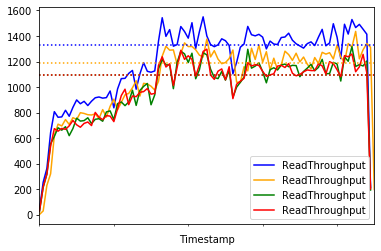

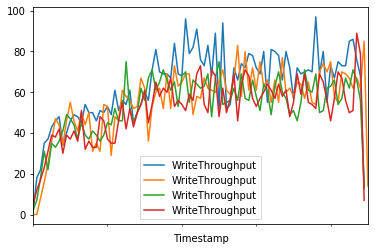

In [23]:
from matplotlib import pyplot as plt
import numpy as np
import math


ax = plt.gca()
ax.xaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_minor_locator(plt.MultipleLocator(20))
metric_list[0].plot(kind='line', x='Timestamp', y='ReadThroughput', ax=ax, color='blue')
metric_list[1].plot(kind='line', x='Timestamp', y='ReadThroughput', ax=ax, color='orange')
metric_list[2].plot(kind='line', x='Timestamp', y='ReadThroughput', ax=ax, color='green')
metric_list[3].plot(kind='line', x='Timestamp', y='ReadThroughput', ax=ax, color='red')
plt.axhline(read_medians[0], color='blue', linestyle=':')
plt.axhline(read_medians[1], color='orange', linestyle=':')
plt.axhline(read_medians[2], color='green', linestyle=':')
plt.axhline(read_medians[3], color='red', linestyle=':')
plt.show()

ax = plt.gca()
ax.xaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_minor_locator(plt.MultipleLocator(20))
metric_list[0].plot(kind='line', x='Timestamp', y='WriteThroughput', ax=ax)
metric_list[1].plot(kind='line', x='Timestamp', y='WriteThroughput', ax=ax)
metric_list[2].plot(kind='line', x='Timestamp', y='WriteThroughput', ax=ax)
metric_list[3].plot(kind='line', x='Timestamp', y='WriteThroughput', ax=ax)
plt.show()